# 日経平均株価 週足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-06 00:00:00+09:00,27744.900391,27814.960938,27424.689453,27670.980469,293800000,0.0,0.0
2023-02-13 00:00:00+09:00,27550.349609,27727.660156,27266.939453,27513.130859,335200000,0.0,0.0
2023-02-20 00:00:00+09:00,27497.130859,27538.289062,27046.080078,27453.480469,274800000,0.0,0.0
2023-02-27 00:00:00+09:00,27322.730469,27961.210938,27292.740234,27927.470703,363000000,0.0,0.0
2023-03-06 00:00:00+09:00,28182.310547,28734.789062,28118.740234,28143.970703,386300000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-06 00:00:00+09:00,39945.421875,40288.800781,39166.050781,39190.398438,613900000,0.0,0.0
2025-01-13 00:00:00+09:00,39010.960938,39054.351562,38055.679688,38451.460938,457100000,0.0,0.0
2025-01-20 00:00:00+09:00,38671.769531,40279.789062,38643.839844,39931.980469,531000000,0.0,0.0


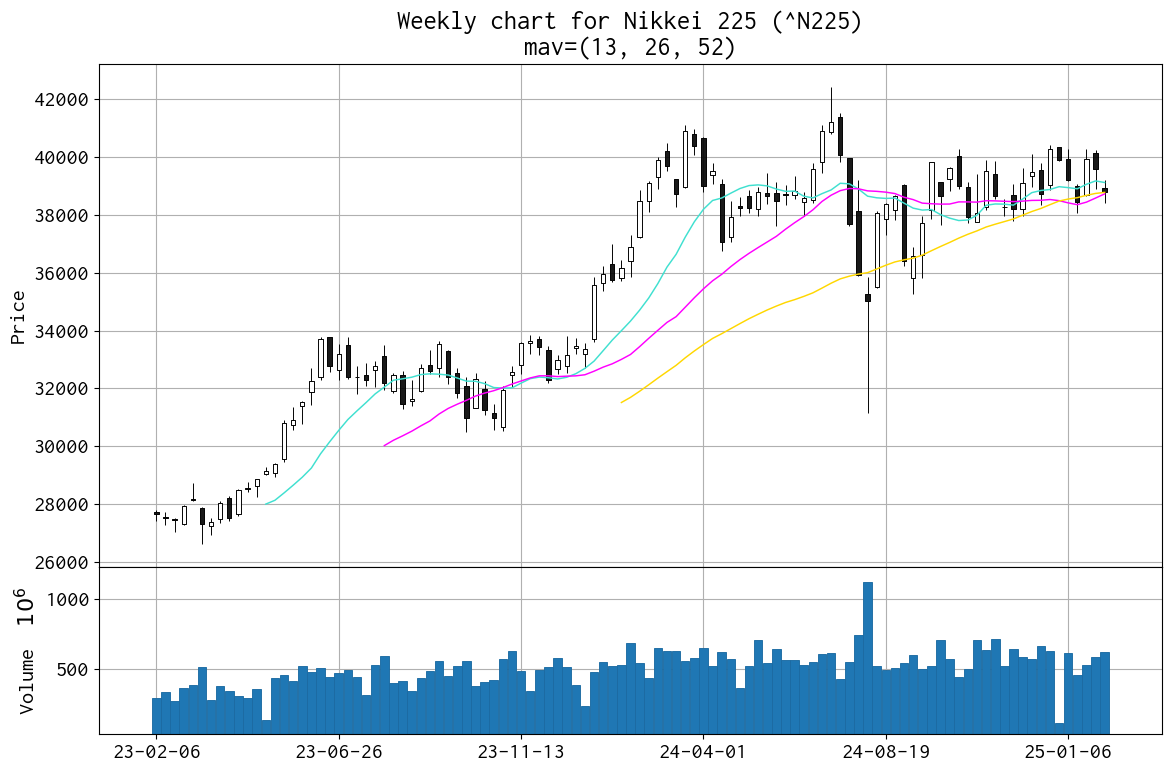

In [2]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()


mpf.plot(
    df, type='candle', style='default',
    mav=(13, 26, 52),
    volume=ax[1],
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' %(ticker.info['longName'], symbol))

plt.tight_layout()
plt.savefig('weekly_chart_n225.png')
plt.show()

In [3]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-27 00:00:00+09:00,40127.738281,40255.679688,38886.050781,39572.488281,589000000,0.0,0.0
2025-02-03 00:00:00+09:00,38932.660156,39192.511719,38401.820312,38787.019531,619400000,0.0,0.0


In [4]:
df.tail(2)['Close']

Date
2025-01-27 00:00:00+09:00    39572.488281
2025-02-03 00:00:00+09:00    38787.019531
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2025-01-27 00:00:00+09:00          NaN
2025-02-03 00:00:00+09:00   -785.46875
Name: Close, dtype: float64

In [10]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-01-27 00:00:00+09:00   -732.226562
dtype: float64

In [11]:
df['Close'].rolling(13).mean()

Date
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
2023-02-27 00:00:00+09:00             NaN
                                 ...     
2024-12-30 00:00:00+09:00    38971.501502
2025-01-06 00:00:00+09:00    38939.547476
2025-01-13 00:00:00+09:00    38898.756010
2025-01-20 00:00:00+09:00    39053.991286
2025-01-27 00:00:00+09:00    39157.209736
Name: Close, Length: 105, dtype: float64

In [12]:
df['Close'].rolling(26).mean()

Date
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
2023-02-27 00:00:00+09:00             NaN
                                 ...     
2024-12-30 00:00:00+09:00    38489.350361
2025-01-06 00:00:00+09:00    38412.416466
2025-01-13 00:00:00+09:00    38350.403846
2025-01-20 00:00:00+09:00    38437.502704
2025-01-27 00:00:00+09:00    38571.572416
Name: Close, Length: 105, dtype: float64

In [13]:
df['Close'].rolling(52).mean()

Date
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
2023-02-27 00:00:00+09:00             NaN
                                 ...     
2024-12-30 00:00:00+09:00    38475.325120
2025-01-06 00:00:00+09:00    38544.811448
2025-01-13 00:00:00+09:00    38592.661283
2025-01-20 00:00:00+09:00    38673.063401
2025-01-27 00:00:00+09:00    38735.322867
Name: Close, Length: 105, dtype: float64